In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-12-14 07:44:20.198403


# Tilastokeskuksen tietokannat

Tilastokeskuksen tietokantoihin (https://statfin.stat.fi/PxWeb/pxweb/fi/StatFin/) tekemistäni kyselyistä voin tallentaa linkkejä, joita voin käyttää koodissa.

Tässä esimerkissä tallennan automaattisesti päivittyvän linkin tietokantapoiminnan tuloksiin. Käytän esimerkissä tietokantapoimintaa tietokantaan **"Vanhojen osakeasuntojen hintaindeksi (2020=100) ja kauppojen lukumäärät, kuukausittain..."**. Kyseiseen tietokantaan pääsee osoitteesta https://statfin.stat.fi/PxWeb/pxweb/fi/StatFin/StatFin__ashi/statfin_ashi_pxt_13ms.px/

Tietokannasta olen poiminut **Neliöhinnat, Kaikki kuukaudet, Pääkaupunkiseutu ja Koko maa ilman pääkaupunkiseutua, Kerrostalot**.

Käänsin manuaalisesti taulukkoa siten että ainoastaan **kuukausi** jäi riveille.

Tietokantapoiminnan viimeisessä vaiheessa (Näytä taulukko) tallensin päivittyvän linkin tietokantapoimintaan **Tallenna poiminta** -toiminnolla. Käytin vaihtoehtoa **Kiinteä aloitusaika, johon lisätään päivitetyt jaksot** ja tiedostomuotoa **Pilkkueroteltu otsikoton**.

Huomaa, että tilastokeskus ei käytä Pythonin oletus merkistökoodausta UTF-8, jonka vuoksi määrittelen käytetyn merkistökoodauksen **encoding**-paramterilla.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://statfin.stat.fi:443/PxWeb/sq/fefc9029-9e16-456b-91ca-124333085037', encoding = 'cp1252')

# Sarakeotsikot
df.columns = ['Kuukausi', 'Pääkaupunkiseutu', 'Muu Suomi']

df

,Kuukausi,Pääkaupunkiseutu,Muu Suomi
0,2020M01,4715,1911
1,2020M02,4684,1958
2,2020M03,4710,1954
3,2020M04,4869,1966
4,2020M05,4758,1948
5,2020M06,4858,1976
6,2020M07,4829,1985
7,2020M08,4881,2011
8,2020M09,4834,1981
9,2020M10,4859,1953


In [3]:
# Poistan tähdet ennakkotiedoista (tähdellä merkitään tietoja, jotka saattavat vielä tarkistusten jälkeen muuttua)
df['Kuukausi'] = df['Kuukausi'].astype(str).str.strip('*')

# Lisään aikaleimat indeksiin. Huomaa formaatti, jossa M vuosiluvun Y ja kuukauden m välissä!
df.index = pd.to_datetime(df['Kuukausi'], format = '%YM%m')
df = df.drop('Kuukausi', axis = 1)

df

,Pääkaupunkiseutu,Muu Suomi
Kuukausi,,
2020-01-01,4715,1911
2020-02-01,4684,1958
2020-03-01,4710,1954
2020-04-01,4869,1966
2020-05-01,4758,1948
2020-06-01,4858,1976
2020-07-01,4829,1985
2020-08-01,4881,2011
2020-09-01,4834,1981


Text(0, 0.5, 'Muu Suomi')

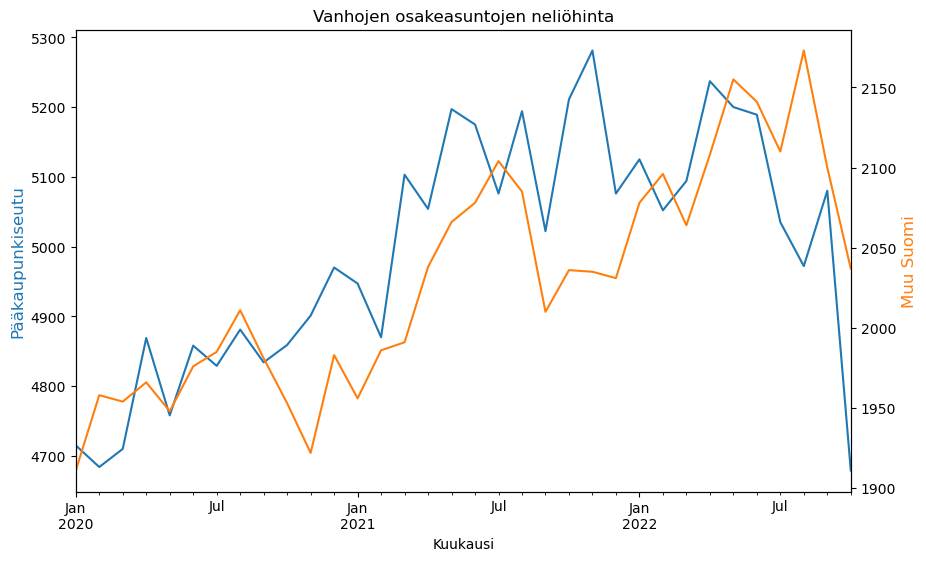

In [4]:
# Viivakuvio neliöhintojen kehityksestä (kummallakin sarjalla oma arvoakseli)

plt.figure(figsize = (10, 6))
ax1 = df['Pääkaupunkiseutu'].plot(color = 'C0', title = 'Vanhojen osakeasuntojen neliöhinta')
ax1.set_ylabel('Pääkaupunkiseutu', color = 'C0', fontsize = 12)
ax2 = ax1.twinx()
df['Muu Suomi'].plot(ax = ax2, color = 'C1')
ax2.set_ylabel('Muu Suomi', color = 'C1', fontsize = 12)